In [165]:
### This script contains the following:
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis

In [166]:
# Import Libraries and Data

In [167]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [168]:
# This option ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [169]:
# CREATING PATH

path= r"C:\Users\Mallika\Documents\Career Foundry\Module2- Data Immersion\Achievement 6\6.1\flavors_of_cacao_cleaned.csv"

In [170]:
# IMPORTING DATA
df=pd.read_csv(path)

In [171]:
#Data Cleaning

In [172]:
# Inspect the data
print(df.info())
print(df.describe())

# Check for null values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company  (Maker-if known)  1795 non-null   object 
 1   BarName                    1795 non-null   object 
 2   REF                        1795 non-null   int64  
 3   ReviewDate                 1795 non-null   int64  
 4   CocoaPercent               1795 non-null   float64
 5   Location                   1795 non-null   object 
 6   Rating                     1795 non-null   float64
 7   BeanType                   1795 non-null   object 
 8   BroadOrigin                1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB
None
               REF   ReviewDate  CocoaPercent       Rating
count  1795.000000  1795.000000   1795.000000  1795.000000
mean   1035.904735  2012.325348     71.698329     3.185933
std     552.886365     2.927210 

In [173]:
df.head

<bound method NDFrame.head of      Company  (Maker-if known)             BarName   REF  ReviewDate  \
0                     A. Morin         Agua Grande  1876        2016   
1                     A. Morin               Kpime  1676        2015   
2                     A. Morin              Atsane  1676        2015   
3                     A. Morin               Akata  1680        2015   
4                     A. Morin              Quilla  1704        2015   
...                        ...                 ...   ...         ...   
1790                    Zotter                Peru   647        2011   
1791                    Zotter               Congo   749        2011   
1792                    Zotter        Kerala State   749        2011   
1793                    Zotter        Kerala State   781        2011   
1794                    Zotter  Brazil, Mitzi Blue   486        2010   

      CocoaPercent Location  Rating   BeanType BroadOrigin  
0             63.0   France    3.75         

In [174]:
# Drop columns not used in EDA
for col in ['REF', 'BarName']:
 if col in df.columns:\
df.drop(columns=col, inplace=True)

In [175]:
# Confirm final shape and columns
df.shape, df.columns.tolist()

((1795, 7),
 ['Company\xa0 (Maker-if known)',
  'ReviewDate',
  'CocoaPercent',
  'Location',
  'Rating',
  'BeanType',
  'BroadOrigin'])

In [176]:
# 1. Normalize all column names: replace any \\xa0 with a normal space, then strip leading/trailing whitespace
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]
print(df.columns)

Index(['Company  (Maker-if known)', 'ReviewDate', 'CocoaPercent', 'Location',
       'Rating', 'BeanType', 'BroadOrigin'],
      dtype='object')


In [177]:
# 2. Now rename the cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin']

In [178]:
# Check for missing values
df.isnull().sum()

Company         0
ReviewDate      0
CocoaPercent    0
Location        0
Rating          0
BeanType        0
BroadOrigin     1
dtype: int64

In [179]:
# "We will leave the missing value as it will not have any effect on the outcome of the analysis"   

In [180]:
# Duplicates check
dups = df.duplicated()

In [181]:
dups.shape

(1795,)

In [182]:
## Note: No Duplicates

In [183]:
# Extreme values 
sns.distplot(df['CocoaPercent'],bins=20)

C:\Users\Mallika\AppData\Local\Temp\ipykernel_16868\3754993600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CocoaPercent'],bins=20)


<Axes: xlabel='CocoaPercent', ylabel='Density'>

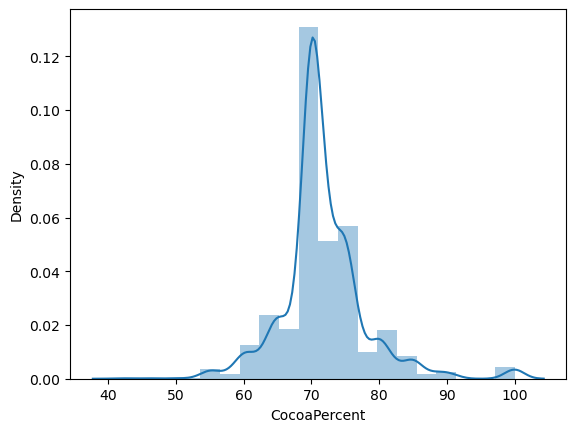

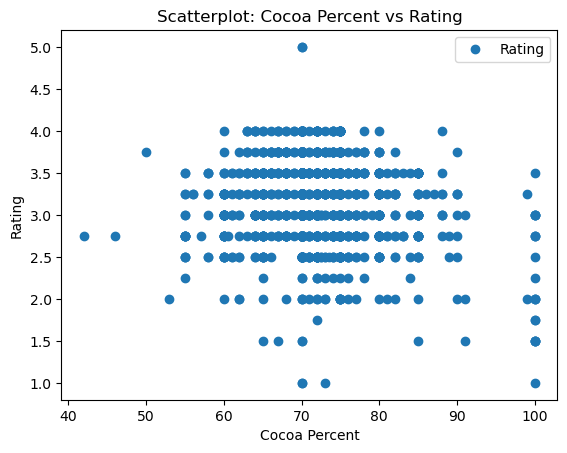

In [184]:
#  Scatterplot: CocoaPercent vs Rating
df.plot( x='CocoaPercent', y='Rating', style='o')
plt.title('Scatterplot: Cocoa Percent vs Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

In [185]:
# Hypothesis : As the cocoa percentage in chocolate increases, the ratings exhibit a slight declining trend, indicating that chocolates with higher cocoa content tend to receive marginally lower ratings.

In [186]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X_1 = df['CocoaPercent'].values.reshape(-1,1)
y_1 = df['Rating'].values.reshape(-1,1)

In [187]:
# Spliting data into a training set and a test set
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [188]:
# Regression Analysis

In [189]:
# Creating a regression object
regression_1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [190]:
# Fit the regression object onto the training set
regression_1.fit(X_1_train, y_1_train)

LinearRegression()

In [191]:
# Predict the values of y using X
y_1_predicted = regression_1.predict(X_1_test)

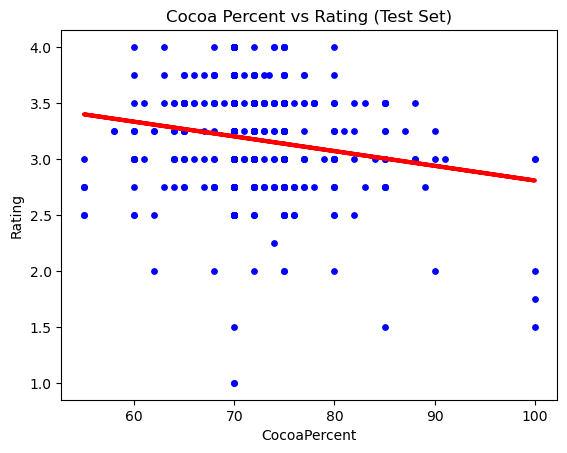

In [192]:
# Create the plot in the desired format
plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='blue', s=15)  # Scatter plot for the test set
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth=3)  # Regression line

# Set plot title and labels
plot_test_1.title('Cocoa Percent vs Rating (Test Set)')
plot_test_1.xlabel('CocoaPercent')
plot_test_1.ylabel('Rating')

# Show the plot
plot_test_1.show()

In [193]:
# ~Explanation: The scatter plot above shows the relationship between Cocoa Percent and Rating for the test dataset.
# ~Each gray dot represents an individual chocolate sample. 
# ~The red line represents the fitted regression line derived from the linear regression model.
# ~From the plot, it is evident that there is a slight negative trend between cocoa percentage and rating — as the cocoa content increases, the average rating tends to decrease slightly. 
# ~However, the data points are widely scattered around the regression line, suggesting that Cocoa Percent alone is not a strong predictor of Rating.

In [194]:
# Creating objects that contain the model summary statistics
rmse_1 = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2_1 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [195]:
# Print the model summary statistics. This is where we evaluate the performance of the model
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[-0.01313255]]
Mean squared error:  0.20953513101526217
R2 score:  0.01811002046167487


In [196]:
# Create a dataframe comparing the actual and predicted values of y.
data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data_1.head(20)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


In [197]:
# Prediction Pattern:
# Predictions tend to hover around the mean rating (~3.2) rather than closely matching high or low actual ratings.
# Most Predictioons are close to actual values that talks about it does not suffer from overfitting or underfitting

In [198]:
### Compare how the regression fits the training set

In [199]:
# Predict
y_1_predicted_train = regression_1.predict(X_1_train) # This is predicting X_1_train

In [200]:
rmse_1 = mean_squared_error(y_1_train, y_1_predicted_train)
r2_1 = r2_score(y_1_train, y_1_predicted_train)

In [201]:
# Print the model summary statistics. This is where we evaluate the performance of the model
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[-0.01313255]]
Mean squared error:  0.22774918296663346
R2 score:  0.029784249226460058


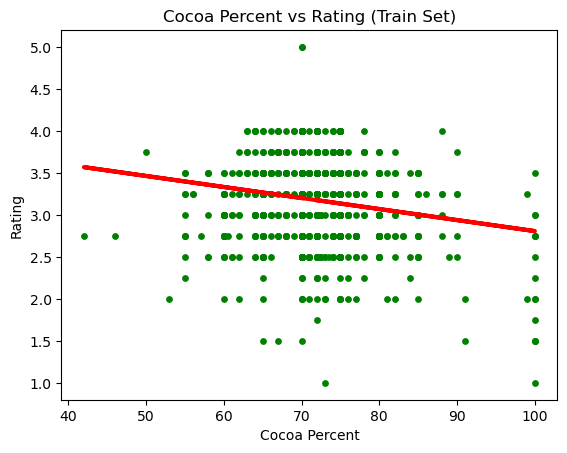

In [202]:
# Visualizing the Training set Results
plot_test_1 = plt
plot_test_1.scatter(X_1_train, y_1_train, color='green', s=15)  # Scatter plot for the train set
plot_test_1.plot(X_1_train, y_1_predicted_train, color='red', linewidth=3)  # Regression line

# Set plot title and labels
plot_test_1.title('Cocoa Percent vs Rating (Train Set)')
plot_test_1.xlabel('Cocoa Percent')
plot_test_1.ylabel('Rating')

# Show the plot
plot_test_1.show()

In [203]:
# Slope : 
#Slope is a coefficient that tells you how the y variable changes when X change. Here Negative slope in test set and train set indicates a negative realtionship.
# The slope here means that as Cococa Percenta rises, Rating slightly drops at a degree of 0.0131
#The slopes for both sets are identicaln (0.0131), indicating a consistent relationship between the variables across the data.

In [204]:
# The root mean squared error (MSE) is an estimator that measures the average of the squared difference between the estimated values and the true values.
# A small MSE, however, means that the regression line passes fairly close to the observations, making it a good fit.
#The MSE values for both the training and testing datasets are relatively close (0.2277 vs. 0.2095). 
# This small difference indicates that the model performs consistently across both datasets, suggesting that it generalizes well and does not suffer from overfitting or underfitting.

In [209]:
# R² of 0.0298 on the training set and 0.0181 on the test set, indicating that it explains only a very small proportion of the variance in chocolate ratings.
# low R² values imply that Cocoa Percent alone is a weak predictor of Rating, and the relationship between these variables is likely influenced by additional, unmodeled factors.

In [210]:
### Reflections on Data Bias

In [211]:
#Possible data bias could significantly impact the model's performance and its generalizability. 
#factors like regional cocoa preference, giving rating patterns, cultural preferences, or data collection inconsistencies could introduce biases that skew predictions. Addressing this would require a balanced dataset and potentially incorporating additional features to account for such disparities.